Loaded X shape: (880, 620)
Loaded y shape: (880,)
Using unique labels as class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


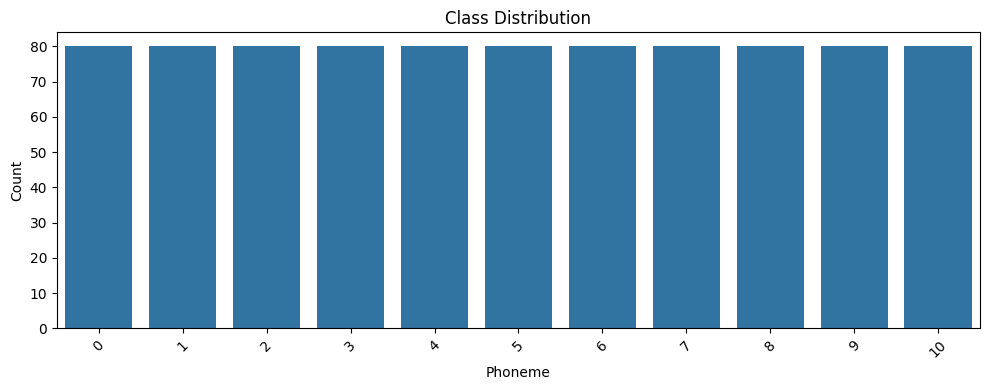

Explained variance ratios by PCA components: [0.28300687 0.14057942 0.05695889]


Text(0.5, 0, 'PC3')

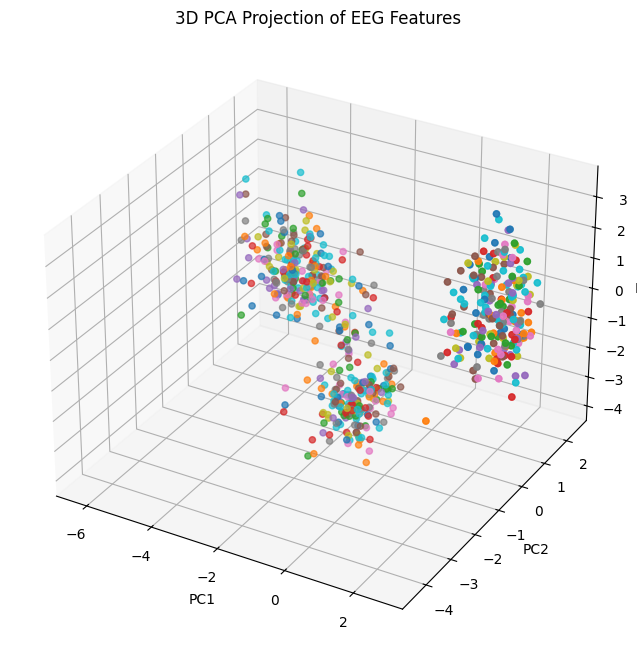

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# === Load features and labels ===
X = pd.read_csv("../processed_data/X.csv").values
y = pd.read_csv("../processed_data/y.csv").values.ravel()

print(f"Loaded X shape: {X.shape}")
print(f"Loaded y shape: {y.shape}")

# === If labels are numeric, decode to class names (optional) ===
# If you saved original labels in a labels.txt, load it here:
try:
    with open("./processed_data/labels.txt", "r") as f:
        class_names = f.read().strip().split(",")
    print("Loaded class names:", class_names)
except FileNotFoundError:
    class_names = [str(c) for c in np.unique(y)]
    print("Using unique labels as class names:", class_names)

# === Plot class distribution ===
plt.figure(figsize=(10,4))
sns.countplot(x=y)
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
plt.title("Class Distribution")
plt.xlabel("Phoneme")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# === PCA to reduce dimensionality for visualization ===
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

print(f"Explained variance ratios by PCA components: {pca.explained_variance_ratio_}")

# === 3D scatter plot of PCA components ===
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_pca[:,0], X_pca[:,1], X_pca[:,2],
    c=y, cmap='tab10', alpha=0.7
)
ax.set_title("3D PCA Projection of EEG Features")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

